# Test stuff for PFN model

Classify pions, photons, and **scalars**

In [1]:
# Add import paths
import sys
sys.path.append("..")

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import datetime as dt
from utils import print_gpu_memory, model_dir

# Make tensorflow not use too much memory
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Importing tensorflow...
Enabling memory growth...


In [2]:
# Get data
from data import get_data
(X_train, X_val, X_test,
 Y_train, Y_val, Y_test) = get_data("processed/scalars/all_jets_point_cloud.npz")

print(X_train.shape, Y_train.shape)

(240000, 960, 4) (240000, 3)


In [3]:
# Build model
from model import PFN
Phi_sizes = [128, 128, 128, 128, 64, 64, 64]
F_sizes = [128, 128, 128, 128, 64, 64, 64]

_, n_particles, n_features = X_train.shape
model = PFN(
    n_features=n_features,
    n_particles=n_particles,
    n_outputs=Y_train.shape[1],
    Phi_sizes=Phi_sizes,
    F_sizes=F_sizes
)

In [4]:
from collections import defaultdict
history = defaultdict(list)

In [5]:
# Utility functions for training
from train_model import train_model
import yaml

def train_iteration(lr, epochs):
    fit_history = train_model(
        model=model, 
        data=(X_train, X_val, Y_train, Y_val),
        lr=lr,
        epochs=epochs
    )
    print(f"\nSaving history...")
    for key in ["loss", "val_loss", "accuracy", "val_accuracy"]:
        history[key].extend(fit_history.history[key])
    return fit_history

def save_model(name):
    cur_date = dt.datetime.now().strftime("%Y-%m-%d")
    model.save(f"{model_dir}/{name}_{cur_date}")

In [6]:
print_gpu_memory()

GPU memory usage
  current: 556.75 KB
  peak:    618.25 KB


In [7]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-4, epochs=45)

=== Training [2023-06-09 14:05:22.007478] ===
Epoch 1/45
2400/2400 [==============================] - 58s 19ms/step - loss: 2.0241 - accuracy: 0.3387 - val_loss: 1.1522 - val_accuracy: 0.3364
Epoch 2/45
2400/2400 [==============================] - 46s 19ms/step - loss: 1.0621 - accuracy: 0.4221 - val_loss: 1.0003 - val_accuracy: 0.4834
Epoch 3/45
2400/2400 [==============================] - 46s 19ms/step - loss: 1.0248 - accuracy: 0.4596 - val_loss: 0.9742 - val_accuracy: 0.4890
Epoch 4/45
2400/2400 [==============================] - 47s 19ms/step - loss: 0.9891 - accuracy: 0.4809 - val_loss: 0.9935 - val_accuracy: 0.4748
Epoch 5/45
2400/2400 [==============================] - 46s 19ms/step - loss: 0.9721 - accuracy: 0.4911 - val_loss: 1.0183 - val_accuracy: 0.4378
Epoch 6/45
2400/2400 [==============================] - 46s 19ms/step - loss: 0.9824 - accuracy: 0.4847 - val_loss: 0.9558 - val_accuracy: 0.5089
Epoch 7/45
2400/2400 [==============================] - 46s 19ms/step - loss: 

In [8]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-5, epochs=45)

=== Training [2023-06-09 14:40:51.165770] ===
Epoch 1/45
2400/2400 [==============================] - 51s 19ms/step - loss: 0.2535 - accuracy: 0.8990 - val_loss: 0.2385 - val_accuracy: 0.9047
Epoch 2/45
2400/2400 [==============================] - 46s 19ms/step - loss: 0.2366 - accuracy: 0.9064 - val_loss: 0.2355 - val_accuracy: 0.9065
Epoch 3/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.2258 - accuracy: 0.9116 - val_loss: 0.2192 - val_accuracy: 0.9149
Epoch 4/45
2400/2400 [==============================] - 46s 19ms/step - loss: 0.2184 - accuracy: 0.9147 - val_loss: 0.2126 - val_accuracy: 0.9171
Epoch 5/45
2400/2400 [==============================] - 46s 19ms/step - loss: 0.2124 - accuracy: 0.9172 - val_loss: 0.2318 - val_accuracy: 0.9103
Epoch 6/45
2400/2400 [==============================] - 46s 19ms/step - loss: 0.2054 - accuracy: 0.9204 - val_loss: 0.2038 - val_accuracy: 0.9192
Epoch 7/45
2400/2400 [==============================] - 46s 19ms/step - loss: 

In [9]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-6, epochs=30)

=== Training [2023-06-09 15:16:20.584163] ===
Epoch 1/30
2400/2400 [==============================] - 62s 20ms/step - loss: 0.1040 - accuracy: 0.9637 - val_loss: 0.1099 - val_accuracy: 0.9608
Epoch 2/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.1030 - accuracy: 0.9640 - val_loss: 0.1092 - val_accuracy: 0.9611
Epoch 3/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.1025 - accuracy: 0.9640 - val_loss: 0.1077 - val_accuracy: 0.9614
Epoch 4/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.1019 - accuracy: 0.9642 - val_loss: 0.1083 - val_accuracy: 0.9613
Epoch 5/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.1017 - accuracy: 0.9644 - val_loss: 0.1063 - val_accuracy: 0.9617
Epoch 6/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.1013 - accuracy: 0.9645 - val_loss: 0.1074 - val_accuracy: 0.9615
Epoch 7/30
2400/2400 [==============================] - 45s 19ms/step - loss: 

In [12]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-7, epochs=15)

=== Training [2023-06-09 22:47:28.211818] ===
Epoch 1/15
2400/2400 [==============================] - 69s 20ms/step - loss: 0.0943 - accuracy: 0.9670 - val_loss: 0.0997 - val_accuracy: 0.9644
Epoch 2/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0942 - accuracy: 0.9670 - val_loss: 0.0996 - val_accuracy: 0.9647
Epoch 3/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0941 - accuracy: 0.9672 - val_loss: 0.0996 - val_accuracy: 0.9647
Epoch 4/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0940 - accuracy: 0.9671 - val_loss: 0.0998 - val_accuracy: 0.9644
Epoch 5/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0941 - accuracy: 0.9671 - val_loss: 0.0999 - val_accuracy: 0.9642
Epoch 6/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0941 - accuracy: 0.9671 - val_loss: 0.0998 - val_accuracy: 0.9647
Epoch 7/15
2400/2400 [==============================] - 46s 19ms/step - loss: 

In [13]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-7, epochs=15)

=== Training [2023-06-09 23:11:10.802391] ===
Epoch 1/15
2400/2400 [==============================] - 51s 19ms/step - loss: 0.0938 - accuracy: 0.9672 - val_loss: 0.0991 - val_accuracy: 0.9648
Epoch 2/15
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0938 - accuracy: 0.9672 - val_loss: 0.0991 - val_accuracy: 0.9649
Epoch 3/15
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0938 - accuracy: 0.9672 - val_loss: 0.0995 - val_accuracy: 0.9646
Epoch 4/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0938 - accuracy: 0.9673 - val_loss: 0.0992 - val_accuracy: 0.9652
Epoch 5/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0937 - accuracy: 0.9673 - val_loss: 0.0995 - val_accuracy: 0.9642
Epoch 6/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0938 - accuracy: 0.9673 - val_loss: 0.0991 - val_accuracy: 0.9651
Epoch 7/15
2400/2400 [==============================] - 46s 19ms/step - loss: 

In [15]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-6, epochs=15)

=== Training [2023-06-09 23:35:31.968216] ===
Epoch 1/15
2400/2400 [==============================] - 50s 19ms/step - loss: 0.0955 - accuracy: 0.9663 - val_loss: 0.1002 - val_accuracy: 0.9653
Epoch 2/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0954 - accuracy: 0.9666 - val_loss: 0.1002 - val_accuracy: 0.9644
Epoch 3/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0953 - accuracy: 0.9665 - val_loss: 0.0997 - val_accuracy: 0.9641
Epoch 4/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0950 - accuracy: 0.9665 - val_loss: 0.1002 - val_accuracy: 0.9642
Epoch 5/15
2400/2400 [==============================] - 47s 19ms/step - loss: 0.0951 - accuracy: 0.9665 - val_loss: 0.1019 - val_accuracy: 0.9630
Epoch 6/15
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0949 - accuracy: 0.9670 - val_loss: 0.1001 - val_accuracy: 0.9646
Epoch 7/15
2400/2400 [==============================] - 46s 19ms/step - loss: 

In [18]:
save_model("96.58%")

INFO:tensorflow:Assets written to: /usatlas/atlas01/atlasdisk/users/atlas_wifeng/photon-jet/models/pfn/96.58%_2023-06-09/assets


### Evaluate model

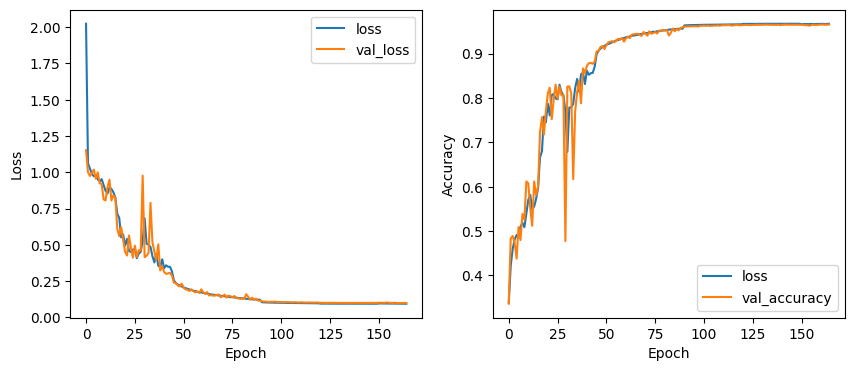

In [16]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axs

ax1.plot(history["loss"])
ax1.plot(history["val_loss"])
ax1.legend(["loss", "val_loss"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss");

ax2.plot(history["accuracy"])
ax2.plot(history["val_accuracy"])
ax2.legend(["loss", "val_accuracy"])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy");

60/60 [==============================] - 11s 29ms/step
Testing accuracy: 0.9658


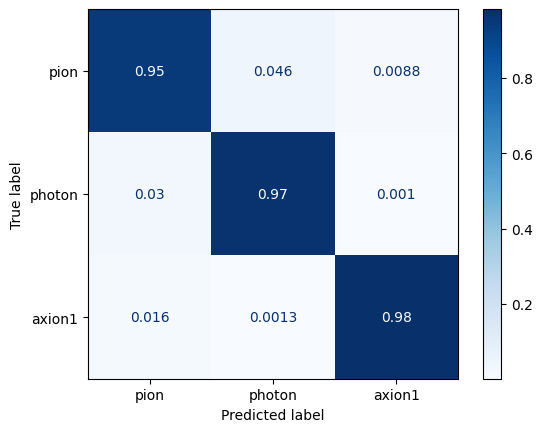

In [17]:
# Test model
from test_model import test_model, plot_cm
test_accuracy, cm = test_model(model, (X_test, Y_test))
print(f"Testing accuracy: {test_accuracy}")

plot_cm(cm, ["pion", "photon", "axion1"])